
<h1><center><b>Data Cleaning</b></h1>



#### **QUESTION OR DECISION**
Which clients are most likely to abandon the telecommunications firm and mainly figure out the why- (what features are particularly crucial in terms of customer churn?)

#### **VARIABLE**
The given collected data contains 10,000 clients from a telecoms firm, with 50 columns/variables - Both data types are present - some are categorical ("Churn" column) and others are numerical ("Income" column). Customers that have left within the last month are listed in the "Churn" column of the dataset.
In order to predict the customer churn rate, some relevant information from the data set are **demographics of customer** (gender, income, age, etc.), **products for which each client has signed up** (phone line,  watching cable TV, for surfing the web, etc) and **customer account information** (such as customer contacts, methods of payments, etc.)
At the end, 8 variables were formed based on a survey asking customers to assess the significance of numerous aspects - it was scaled from 1 (very significant) to 8 (least significant)

#### **METHODOLOGICAL CLEANING PLAN TO FIND ANOMALIES**
1. Since Microsoft Visual studio is the IDE that's being used- a conda environment needs to be set up (download miniconda). Created a data science environment (in this case it's **ds**) by installing various packages through command line. Packages such as pandas, scikit-learn, matplolib were installed for successful importation into Jupyter Notebook. 
2. The raw churn data set is in .csv format. In order for Python to read the appropriate .csv dataset, **read_csv** command is used through Pandas
3. Assess the structured data in order to get a better understanding and designate the dataset as a variable named **"churndataset_ df"**. Useful slices of the dataframe will be stored in the 'df' variable.
4. Take a look at any possible errors, odd data types, or null/invalid information.
5. If there any missing values - make sure to impute data. Replace the null value with either mean, median or mode. One step for imputation of numerical data includes plotting a histogram and checking whether imputing the mean is affecting the skewness of the graph. If so, impute median instead. Histograms may also be used to identify outliers that may either generate or conceal statistical significance.
6. Make sure to also look for the Z-Score for each variable. An outlier is defined as a z-score that is more than 3 or less than -3.
7. Remove any unnecessary rows and convert categorical data to numeric data. If feasible, forward or backfill the data, or just zero out the data.

#### JUSTIFICATION OF APPROACH
In order to do an exploratory data analysis, raw data must be cleaned correctly. Since there are so many null values all throughout the dataset, detecting and treating them seemed like the first thing to do. 
Imputing nulls with statistical values (mean, median, mode) seemed like the best way to tackle the issue. To calculate Z score and other normalizations efficiently, importing SciPy package was extremely useful.

#### JUSTIFICATION OF TOOLS
* Python - Easier language to learn compared to R. Python is simple, language is easier to comprehend and syntax seems logical. 
* Visual Studio (IDE) - Jupyter Notebook is integrated within the program and it also has an in-built debugger. As mentioned before, miniconda is used to install specific packages for the offline kernal
* Numpy - used for working with arrays
* Pandas - to load dataset into the py space from other platforms (from .csv)
* Seaborn - for data visualization purposes. Also it's more at ease with Pandas data frames.
* Matplotlib - plotting charts. 
* Scipy - for statistics (calculation of Z score and other normalization)

#### CODE

In [402]:
#As seen below, Packages are already installed through miniconda command line. Kernal ('ds': conda)
!pip install matplotlib
!pip install scipy
!pip install numpy
!pip install pandas
!pip install sklearn
!pip install seaborn

In [403]:
#import relevant Python Packages and libraries into the Jupyter Notebook
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [404]:
# Loading and displaying the .csv file into Python using Pandas
churndataset_df = pd.read_csv('churn_raw_data.csv')
churndataset_df.head() #returns the first 5 rows.

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,150.761216,271.493436,4,4,4,3,4,4,4,5


In [405]:
#From above, it looks like the column before "CaseOrder" (which is the first column) is Unnamed. Let's inspect more to see if any other columns are unnamed. 
df = churndataset_df.columns
df

Index(['Unnamed: 0', 'CaseOrder', 'Customer_id', 'Interaction', 'City',
       'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area',
       'Timezone', 'Job', 'Children', 'Age', 'Education', 'Employment',
       'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek', 'Email',
       'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem',
       'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year', 'item1', 'item2', 'item3',
       'item4', 'item5', 'item6', 'item7', 'item8'],
      dtype='object')

In [406]:
del churndataset_df['Unnamed: 0'] #deleted the first column

In [407]:
churndataset_df.shape   #now there are 51 columns and 10,000 rows

(10000, 51)

In [408]:
#renaming item 1 - item 8 with appropriate column names from data dictionary

df = churndataset_df.rename(columns = {'item1':'Timely response','item2':'Timely fixes','item3':'Timely replacements','item4':'Reliability','item5':'Options','item6':'Respectful response','item7':'Courteous exchange','item8':'Active Listening'})
df

,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,Timely response,Timely fixes,Timely replacements,Reliability,Options,Respectful response,Courteous exchange,Active Listening
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,...,150.761216,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,640,...,159.828800,6511.253000,3,2,3,3,4,3,2,3
9996,9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,77168,...,208.856400,5695.952000,4,5,5,4,4,5,2,5
9997,9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,406,...,168.220900,4159.306000,4,4,4,4,4,4,4,5
9998,9999,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,Carrollton,GA,Carroll,30117,33.58016,-85.13241,35575,...,252.628600,6468.457000,4,4,6,4,3,3,5,4


In [409]:
df.describe()  #statistics : The result's index will contain count, mean, standard deviation, min, max, as well as lower, 50, and higher percentiles for numeric data.

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,Timely response,Timely fixes,Timely replacements,Reliability,Options,Respectful response,Courteous exchange,Active Listening
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,7505.000000,7525.000000,7510.000000,10000.000000,10000.000000,...,10000.000000,8979.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.095936,53.275748,39936.762226,11.452955,12.016000,...,174.076305,3398.842752,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.154758,20.753928,28358.469482,7.025921,3.025898,...,43.335473,2187.396807,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.000000,18.000000,740.660000,-1.348571,1.000000,...,77.505230,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.000000,35.000000,19285.522500,8.054362,10.000000,...,141.071078,1234.110529,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.000000,53.000000,33186.785000,10.202896,12.000000,...,169.915400,3382.424000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.000000,71.000000,53472.395000,12.487644,14.000000,...,203.777441,5587.096500,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.000000,89.000000,258900.700000,47.049280,23.000000,...,315.878600,7158.982000,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [410]:
stats4df = df.drop(columns = ['CaseOrder', 'Zip', 'Lat', 'Lng']) #CaseOrder, Zip, Lat and Long's statistics doesn't really matter. Their stats don't really bring any value to the client. So why not drop?


In [411]:
#Detecting missing value in python
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  Timezone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              7505 non-null   float64
 14  Age                   7525 non-null   float64
 15  Education           

CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtecti

In [412]:
#Churn Rate: #Total Number of Customers Lost During Period/ Total Number of Customers of Company at Beginning of Period 
churn_rate434 =df.Churn.value_counts()/9999
churn_rate434 
#Yes: 27%, No: 73%

No     0.735074
Yes    0.265027
Name: Churn, dtype: float64

In [413]:
#see if there are any duplicate rows 
duplicates4life = df.loc[df.duplicated()]
print(duplicates4life)
#Empty Dataframe is sound - which mean no rows are duplicated. 

Empty DataFrame
Columns: [CaseOrder, Customer_id, Interaction, City, State, County, Zip, Lat, Lng, Population, Area, Timezone, Job, Children, Age, Education, Employment, Income, Marital, Gender, Churn, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure, Techie, Contract, Port_modem, Tablet, InternetService, Phone, Multiple, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, PaymentMethod, Tenure, MonthlyCharge, Bandwidth_GB_Year, Timely response, Timely fixes, Timely replacements, Reliability, Options, Respectful response, Courteous exchange, Active Listening]
Index: []

[0 rows x 51 columns]


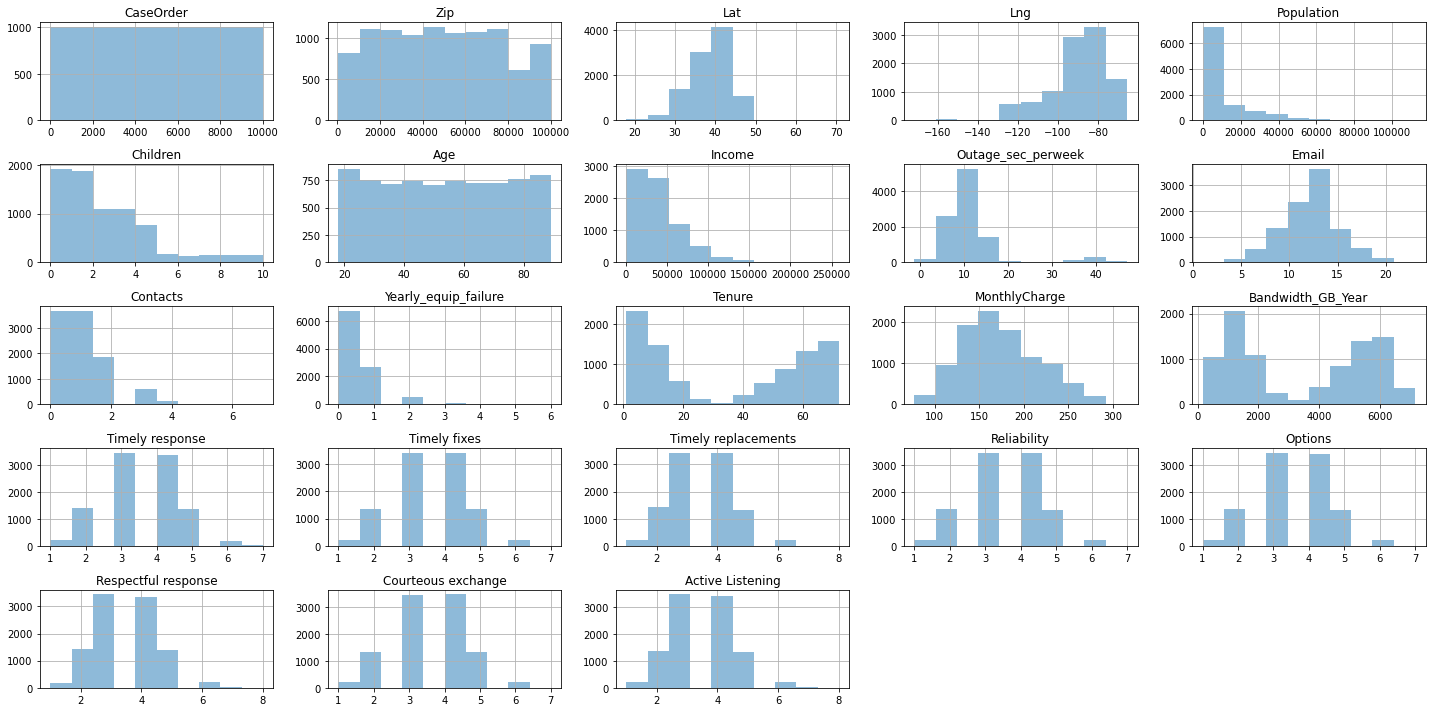

In [414]:
#Histogram is applied to the dataframe directly.
df.hist(alpha=0.5, figsize=(20, 10))
plt.tight_layout()
plt.show()
#Observe Graphs with null values - Children, Age, Income, Techie, Phone, TechSupport, Tenure, Bandwisth-GB-Year

In [415]:
#Perform Imputation - 
# Children: Skewed Distribution -Median
# Age: Mean - Looks like an Uniform Distribution
# Income: Skewed Distribution - Median
# Techie: Mode
# Phone: Mode
# TechSupport: Mode
# Tenure: Bimodal Distribution
# Bandwisth-GB-Year:Bimodal distribution

df['Children'].fillna(df['Children'].median(), inplace = True)
df['Age'].fillna(df['Age'].mean(), inplace = True)
df['Income'].fillna(df['Income'].median(), inplace = True)
df['Tenure'].fillna(df['Tenure'].median(), inplace = True)
df['Bandwidth_GB_Year'].fillna(df['Bandwidth_GB_Year'].median(), inplace = True)
df['Techie'].fillna(df['Techie'].mode()[0], inplace=True)
df['Phone'].fillna(df['Phone'].mode()[0], inplace=True)
df['TechSupport'].fillna(df['TechSupport'].mode()[0], inplace=True)

In [416]:
df.isnull().sum()  #no more null values!! (for the most part..)

CaseOrder               0
Customer_id             0
Interaction             0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
Timezone                0
Job                     0
Children                0
Age                     0
Education               0
Employment              0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBil

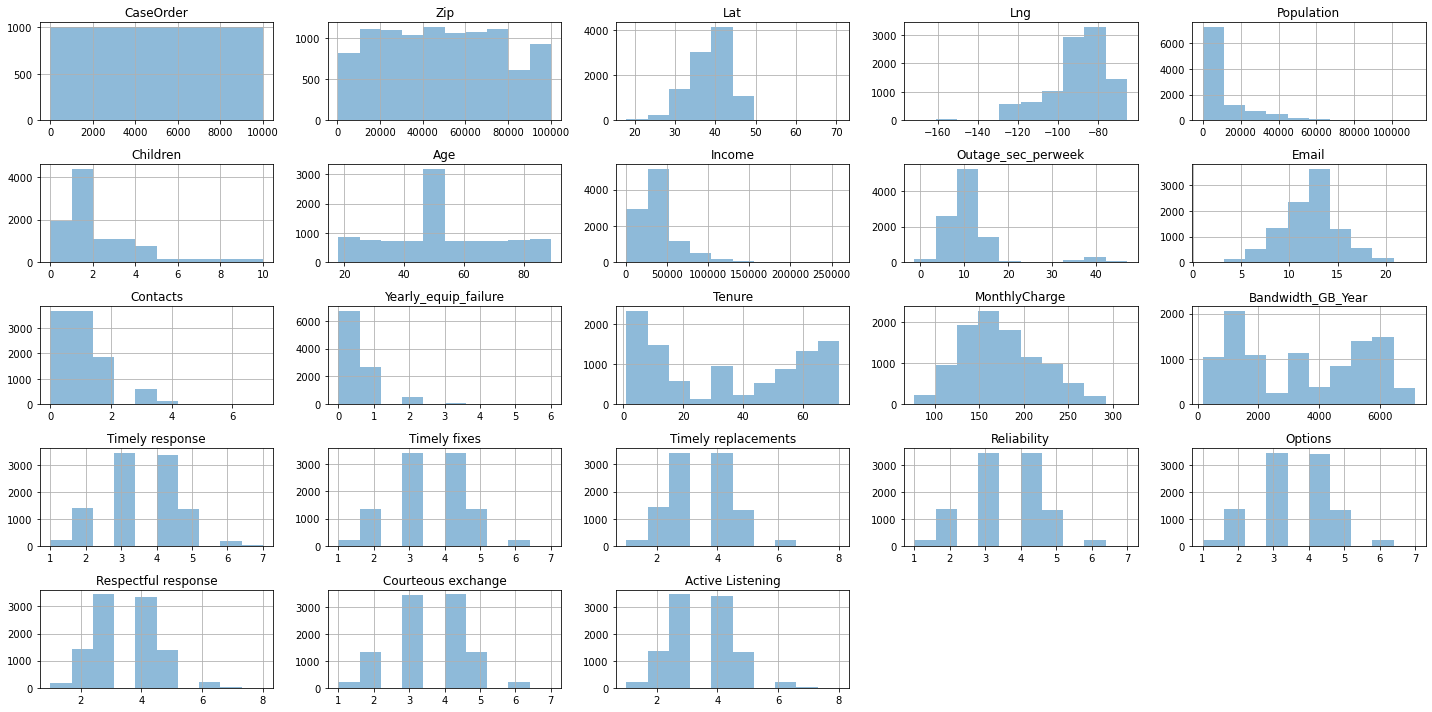

In [417]:
#Data Visualization after filling in all the nulls
df.hist(alpha=0.5, figsize=(20, 10))
plt.savefig('histogram.jpg')
plt.tight_layout()
plt.show()

In [418]:
from pandas import DataFrame
import scipy.stats as stats

In [419]:
#ordinal encoding for area
df['Area'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [420]:
df['Area_numbers1'] = df['Area']

In [421]:
dict_edu1 = {"Area_numbers1": {"Rural": 0, "Suburban": 1,"Urban": 2, }}

In [422]:
df.replace(dict_edu1, inplace = True)

In [423]:
#ordinal encoding for education
df['Education'].unique()

array(["Master's Degree", 'Regular High School Diploma',
       'Doctorate Degree', 'No Schooling Completed', "Associate's Degree",
       "Bachelor's Degree", 'Some College, Less than 1 Year',
       'GED or Alternative Credential',
       'Some College, 1 or More Years, No Degree',
       '9th Grade to 12th Grade, No Diploma',
       'Nursery School to 8th Grade', 'Professional School Degree'],
      dtype=object)

In [424]:
df['Education_numbers1'] = df['Education']

In [425]:
dict_edu2 = {"Education_numbers1": {"No Schooling Completed": 0, "Nursery School to 8th Grade": 1,"9th Grade to 12th Grade, No Diploma": 2, "Regular High School Diploma": 3, "GED or Alternative Credential": 4,"Some College, Less than 1 Year": 5,
"Professional School Degree" : 6, "Associate's Degree" : 7, "Bachelor's Degree" : 8, "Master's Degree" : 9, "Doctorate Degree" : 10}}

In [426]:
df.replace(dict_edu2, inplace = True)

In [427]:
#ordinal encoding for employment
df['Employment'].unique()

array(['Part Time', 'Retired', 'Student', 'Full Time', 'Unemployed'],
      dtype=object)

In [428]:
df['Employment_numbers1'] = df['Employment']

In [429]:
dict_edu3 = {'Employment_numbers1': {'Unemployed': 0, 'Student': 1, 'Part Time': 2, 'Full Time': 3, 'Unemployed': 4, 'Retired': 5}}

In [430]:
df.replace(dict_edu3, inplace = True)

In [431]:
#ordinal encoding for contract
df['Contract'].unique()

array(['One year', 'Month-to-month', 'Two Year'], dtype=object)

In [432]:
df['Contract_numbers1'] = df['Contract']

In [433]:
dict_edu4 = {"Contract_numbers1": {"Month-to-month": 0, "One year": 1, "Two Year": 2}}

In [434]:
df.replace(dict_edu4, inplace = True)

In [435]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  Timezone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  float64
 14  Age                   10000 non-null  float64
 15  Education           

### Detecting Outliers 















In [436]:
print(stats4df.std())

Population              14432.698671
Children                    2.154758
Age                        20.753928
Income                  28358.469482
Outage_sec_perweek          7.025921
Email                       3.025898
Contacts                    0.988466
Yearly_equip_failure        0.635953
Tenure                     26.438904
MonthlyCharge              43.335473
Bandwidth_GB_Year        2187.396807
Timely response             1.037797
Timely fixes                1.034641
Timely replacements         1.027977
Reliability                 1.025816
Options                     1.024819
Respectful response         1.033586
Courteous exchange          1.028502
Active Listening            1.028633
dtype: float64


C:\Users\HP\AppData\Local\Temp/ipykernel_13020/1833476612.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(stats4df.std())


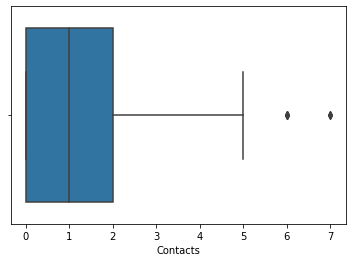

In [437]:
boxplot=sns.boxplot(x='Contacts',data=df)

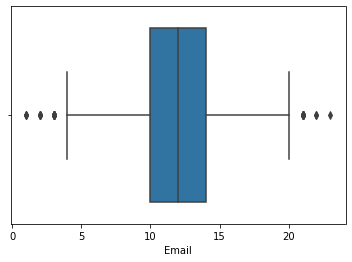

In [438]:
boxplot=sns.boxplot(x='Email',data=df)

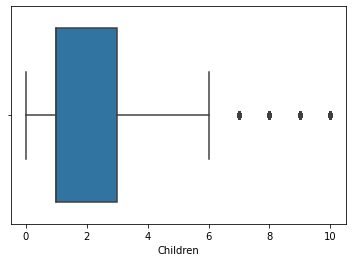

In [439]:
boxplot=sns.boxplot(x='Children',data=df)

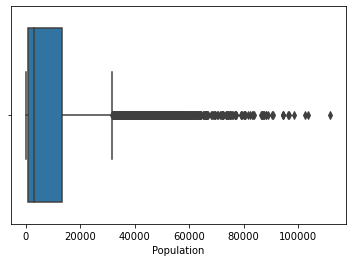

In [440]:
boxplot=sns.boxplot(x='Population',data=df)

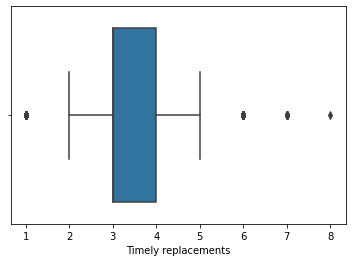

In [441]:
boxplot=sns.boxplot(x='Timely replacements',data=df)

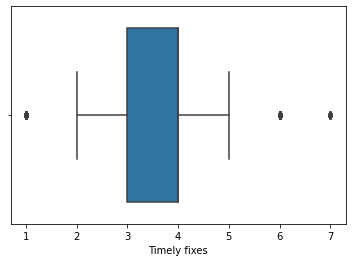

In [442]:
boxplot=sns.boxplot(x='Timely fixes',data=df)

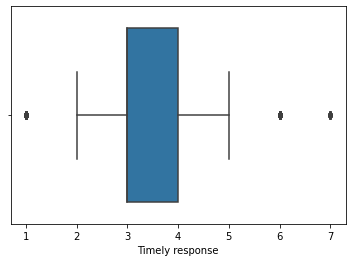

In [443]:
boxplot=sns.boxplot(x='Timely response',data=df)

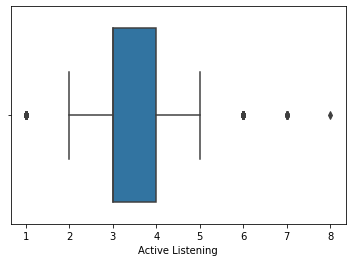

In [444]:
boxplot=sns.boxplot(x='Active Listening',data=df)

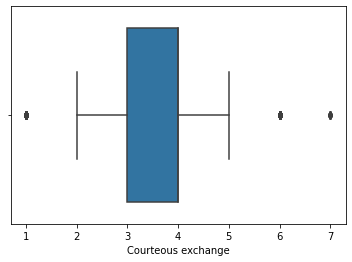

In [445]:
boxplot=sns.boxplot(x='Courteous exchange',data=df)

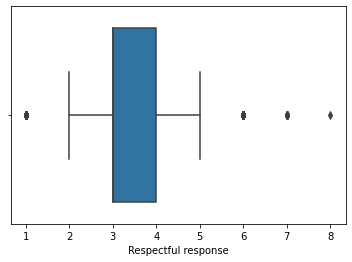

In [446]:
boxplot=sns.boxplot(x='Respectful response',data=df)

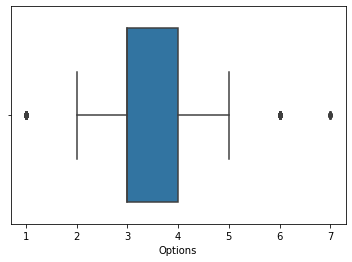

In [447]:
boxplot=sns.boxplot(x='Options',data=df)

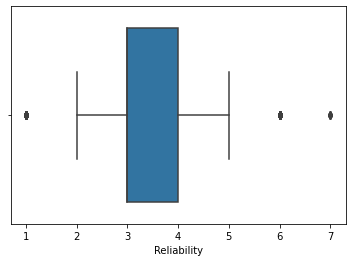

In [448]:
boxplot=sns.boxplot(x='Reliability',data=df)

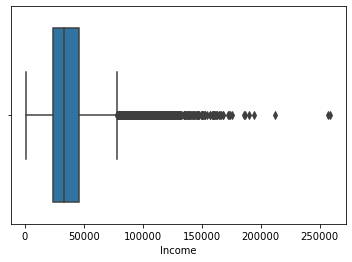

In [449]:
#Income
boxplot=sns.boxplot(x='Income',data=df)

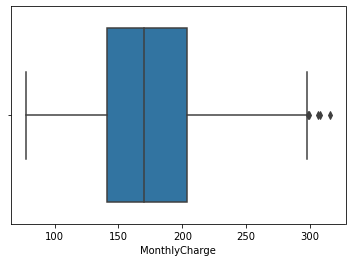

In [450]:
#Monthly_charge
boxplot=sns.boxplot(x='MonthlyCharge',data=df)

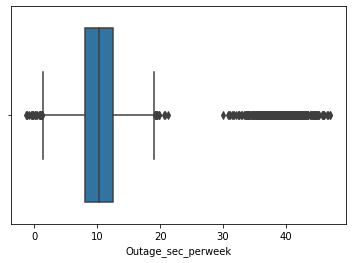

In [451]:
boxplot=sns.boxplot(x='Outage_sec_perweek',data=df)

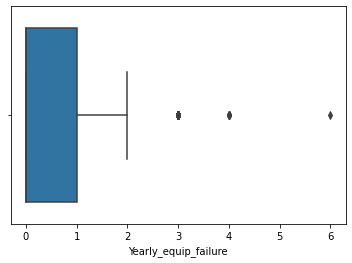

In [452]:
boxplot=sns.boxplot(x='Yearly_equip_failure',data=df)

In [453]:
stats4df.describe()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timely response,Timely fixes,Timely replacements,Reliability,Options,Respectful response,Courteous exchange,Active Listening
count,10000.000000,7505.000000,7525.000000,7510.000000,10000.000000,10000.000000,10000.000000,10000.000000,9069.000000,10000.000000,8979.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9756.562400,2.095936,53.275748,39936.762226,11.452955,12.016000,0.994200,0.398000,34.498858,174.076305,3398.842752,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,14432.698671,2.154758,20.753928,28358.469482,7.025921,3.025898,0.988466,0.635953,26.438904,43.335473,2187.396807,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,0.000000,0.000000,18.000000,740.660000,-1.348571,1.000000,0.000000,0.000000,1.000259,77.505230,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,738.000000,0.000000,35.000000,19285.522500,8.054362,10.000000,0.000000,0.000000,7.890442,141.071078,1234.110529,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,2910.500000,1.000000,53.000000,33186.785000,10.202896,12.000000,1.000000,0.000000,36.196030,169.915400,3382.424000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,13168.000000,3.000000,71.000000,53472.395000,12.487644,14.000000,2.000000,1.000000,61.426670,203.777441,5587.096500,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,111850.000000,10.000000,89.000000,258900.700000,47.049280,23.000000,7.000000,6.000000,71.999280,315.878600,7158.982000,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


### Treating Outliers

In [454]:
#Adding Updated Columns
df["Contacts_new"] = np.where(df["Contacts"]>=2,2,df["Contacts"])
df["Children_new"] = np.where(df["Children"]>=3,3,df["Children"])
df["Population_new"] = np.where(df["Population"]>=13168,13168,df["Population"])
df["Income_new"] = np.where(df["Income"]>=53472.395,53472.395,df["Income"])
df["MonthlyCharge_new"] = np.where(df["MonthlyCharge"]>=203.78,203.78, df["MonthlyCharge"])
df["Yearly_equip_failure_new"] = np.where(df["Yearly_equip_failure"]>=1.0,1.0,df["Yearly_equip_failure"])
df["Courteous exchange_new"] = np.where(df["Courteous exchange"]<=3,3, df["Courteous exchange"]) 
df["Email_new"] = np.where(df["Email"]<=10, 10, df["Email"])
df["Timely replacements_new"] = np.where(df["Timely replacements"]>=4, 4, df["Timely replacements"])
df["Timely fixes_new"] = np.where(df["Timely fixes"]>=4, 4, df["Timely fixes"])
df["Timely response_new"] = np.where(df["Timely response"]>=4,4, df["Timely response"])
df["Active Listening_new"] = np.where(df["Active Listening"]>=4,4, df["Active Listening"])
df["Respectful response_new"] = np.where(df["Respectful response"]>=4,4, df["Respectful response"])
df["Options_new"] = np.where(df["Options"]>=4, 4, df["Options"])
df["Reliability_new"] = np.where(df["Reliability"]>=4,4,(df["Reliability"]))
df["Outage_sec_perweek_new"] = np.where(df["Outage_sec_perweek"]>=12.49, 12.49, df["Outage_sec_perweek"])

In [455]:
#Drop Old Columns
df.drop(columns = ['Contacts', 'Children', 'Population', 'Income', 'MonthlyCharge', 'Yearly_equip_failure', "Courteous exchange", "Email", "Timely replacements", "Timely fixes", "Timely response", "Active Listening", "Respectful response", "Options", "Reliability", "Outage_sec_perweek"], inplace = True)

In [456]:
#Adding Updated Columns (with outliers on both sides of the spectrum!)

df["Email_new2"] = np.where(df["Email_new"]>=14, 14, df["Email_new"])
df["Timely replacements_new2"] = np.where(df["Timely replacements_new"]<=3, 3, df["Timely replacements_new"])
df["Timely fixes_new2"] = np.where(df["Timely fixes_new"]<=3, 3, df["Timely fixes_new"])
df["Timely response_new2"] = np.where(df["Timely response_new"]<=3,3, df["Timely response_new"])
df["Active Listening_new2"] = np.where(df["Active Listening_new"]<=3,3, df["Active Listening_new"])
df["Respectful response_new2"] = np.where(df["Respectful response_new"]<=3,3, df["Respectful response_new"])
df["Options_new2"] = np.where(df["Options_new"]<=3, 3, df["Options_new"])
df["Reliability_new2"] = np.where(df["Reliability_new"]<=3,3,(df["Reliability_new"]))
df["Outage_sec_perweek_new2"] = np.where(df["Outage_sec_perweek_new"]<=8.05, 8.05, df["Outage_sec_perweek_new"])
df["Courteous exchange_new2"] = np.where(df["Courteous exchange_new"]>=4,4, df["Courteous exchange_new"]) 

In [457]:
#Drop Old Columns Pt 2. Final Cleaning!
df.drop(columns = ["Courteous exchange_new", "Email_new", "Timely replacements_new", "Timely fixes_new", "Timely response_new", "Active Listening_new", "Respectful response_new", "Options_new", "Reliability_new", "Outage_sec_perweek_new"], inplace = True)

In [458]:
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'City', 'State', 'County',
       'Zip', 'Lat', 'Lng', 'Area', 'Timezone', 'Job', 'Age', 'Education',
       'Employment', 'Marital', 'Gender', 'Churn', 'Techie', 'Contract',
       'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod',
       'Tenure', 'Bandwidth_GB_Year', 'Area_numbers1', 'Education_numbers1',
       'Employment_numbers1', 'Contract_numbers1', 'Contacts_new',
       'Children_new', 'Population_new', 'Income_new', 'MonthlyCharge_new',
       'Yearly_equip_failure_new', 'Email_new2', 'Timely replacements_new2',
       'Timely fixes_new2', 'Timely response_new2', 'Active Listening_new2',
       'Respectful response_new2', 'Options_new2', 'Reliability_new2',
       'Outage_sec_perweek_new2', 'Courteous exchange_new2'],
      dtype='object')

In [459]:
print(df)

      CaseOrder Customer_id                           Interaction  \
0             1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1             2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2             3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3             4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4             5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   
...         ...         ...                                   ...   
9995       9996     M324793  45deb5a2-ae04-4518-bf0b-c82db8dbe4a4   
9996       9997     D861732  6e96b921-0c09-4993-bbda-a1ac6411061a   
9997       9998     I243405  e8307ddf-9a01-4fff-bc59-4742e03fd24f   
9998       9999     I641617  3775ccfc-0052-4107-81ae-9657f81ecdf3   
9999      10000      T38070  9de5fb6e-bd33-4995-aec8-f01d0172a499   

              City State                 County    Zip       Lat        Lng  \
0      Point Baker    AK  Prince of Wales-Hyder  99927  56.25100 -133.37571   
1      West B

In [460]:
#Extracting your Dataframe
df.to_csv('clean_dataset_churn.csv')

## PCA Findings 


In [461]:
churns = pd.read_csv('clean_dataset_churn.csv', index_col = 0)
churns= churns[['Timely replacements_new2', 'Timely fixes_new2', 'Timely response_new2', 'Active Listening_new2', 'Respectful response_new2', 'Options_new2', 'Reliability_new2', 'Courteous exchange_new2']]
churns.head()


,Timely replacements_new2,Timely fixes_new2,Timely response_new2,Active Listening_new2,Respectful response_new2,Options_new2,Reliability_new2,Courteous exchange_new2
0,4,4,4,4,4,4,3,3
1,3,4,3,4,3,4,3,4
2,3,4,4,3,3,4,4,3
3,4,4,4,3,4,4,3,3
4,4,4,4,4,4,4,3,4


In [462]:
churn_normalized12=(churns-churns.mean())/churns.std()
pca = PCA(n_components=churns.shape[1])

In [463]:
pca.fit(churn_normalized12)
churns_pca = pd.DataFrame(pca.transform(churn_normalized12),
columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])

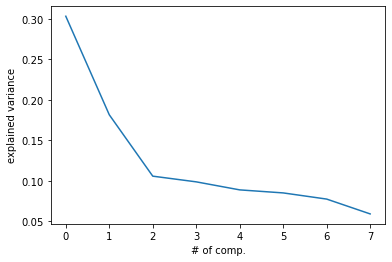

In [464]:

plt.plot(pca.explained_variance_ratio_)
plt.xlabel('# of comp.')
plt.ylabel('explained variance')
plt.show()

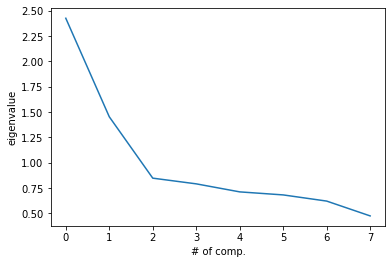

In [465]:
covisd_matrix = np.dot(churn_normalized12.T, churn_normalized12) / churns.shape[0] 
eigenvalues12 = [np.dot(eigenvector.T, np.dot(covisd_matrix, eigenvector)) for eigenvector in pca.components_]
plt.plot(eigenvalues12)
plt.xlabel('# of comp.')
plt.ylabel('eigenvalue')
plt.show()

In [466]:
loadings = pd.DataFrame(pca.components_.T,
columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'],
index=churns.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Timely replacements_new2,0.406100,0.287845,-0.154233,0.194604,-0.174969,-0.246415,0.751470,-0.185815
Timely fixes_new2,0.444487,0.280710,-0.106526,0.197387,-0.013566,0.011839,-0.566665,-0.593204
Timely response_new2,0.470345,0.277494,-0.067222,0.155170,-0.075267,-0.009361,-0.242111,0.780260
Active Listening_new2,0.300367,-0.158577,0.927187,-0.016758,-0.124608,-0.079441,0.026578,-0.046179
Respectful response_new2,0.395698,-0.189792,-0.030947,-0.115512,0.788022,0.371384,0.184464,-0.013015
Options_new2,-0.174188,0.580074,0.190412,-0.095980,-0.158644,0.737469,0.133107,-0.030959
Reliability_new2,0.140360,-0.569610,-0.145607,0.493276,-0.384849,0.490142,0.054057,-0.007145
Courteous exchange_new2,0.345615,-0.198080,-0.205558,-0.795571,-0.392115,0.103518,-0.013884,-0.038279


#### CLEANING FINDINGS:
Lof of variables in the table has many missing values. Treating missing values in significant variable fields were the #1 priority. Since many of the variables had skewed distribution, it only made sense to impute null values with the median value of the variable. Some columns were disregarded when cleaning - since these variables brought little to no meaning and I found it to be less useful for decision making. 
To find the outliers - I imported sea born library and made a box plot of each of the relevant variable. This gave me a clear picture of where some of the outliers in the dataset were. And using feature engineering process - I was able to clear these outliers efficiently. 

#### JUSTIFICATION OF MITIGATION METHODS

Missing Values were treated. Now there is 0 null values. All the columns have been filled appropriately. 
For categorical data, I used mode function and for numerical data, I used median and mean function accordingly. For uniformal distribution - where there are little to no peak - I used the mean value. If I had used the mean value for the skewed distribution, there will be a chance for the dataset to be highly manipulated. 
For outliers - any values over the 75 percentile will be matched to the 75th percentile of the box plot. Any values less than the 25th percentile will be matched to the 25th percentile of the box plot. 

#### SUMMARY OF THE OUTCOMES
Checked whether there are any duplicated rows. Looked like there were none. I was able to filter unwanted outliers and treated the missing data will .fillna() function
At the end of the process, I was satisified with how the data came out to be. 
The Cleaned dataset were then exported to a csv file called clean_dataset_churn.csv. 



#### LIMITATIONS
From the looks of it, there were many null values prior to cleaning. I was wondering why? Why were there so many missing values in the data set. Why were there so many outliers in the dataset. Were mistakes made while entering data, or did the outliers bring new value to the company. 


#### IMPACT OF THE LIMITATIONS

 By knowing the answer to this question, it would have given me a better insight on what exactly needed to be cleaned up. In real world, this scenerio would be completely different. If I had any questions, there are so many people outside of the department that I was working on - would help and guide me on how exactly the data should be cleaned. 

#### PRINCIPAL COMPONENTS

PCA is used to make the analysis much more efficient. Since you are grouping variable based on likeness - it reduced the overall number of variables. 
When there are large loadings, it shows that the variable is strong correleted on that principal component. 
Negative loadings indicate a negative correlation. 

Look at the code and graph above to see the PCA table and the components vs variance graph. 
For PCA, anything below the bent line negatively affects the graph . Anything above the bent line positively affects the graph. 



#### CRITERIA USED

Used all 8 survey responses as variables fro the PCA. Plot the screeplot graph and got the selection of number of relevant points to be considered. Eigenvalue number is assigned to a component to represent how good it is at explaining the variance in a dataset. Greater than 1: PC(Grouping) is better at explaining variance. The bent in the line occured around 2 . Loadings showed which were the most important features for the churn rate explanation. 

#### BENEFITS

Timely Fixes, Timely responses and Timely replacements and Respective Responses have all strong correlation within PC 1. Relevant Options had strong correlation with PC 2. 
So in conclusion, to reduce the churn rate and reduce the number of customers leaving the company, it is best fixed if the company does a better job fixing issues promptly, if the company has
prompt responses, replaced items on time and if they were respectful towards their customers. These are all preductive factors. We are all not 100% sure if the churn rate would increase or decrease whether or not the company does a better job fixing these issues. PC 1 shows the most variation. 

### SOURCES 

1. Pandas.DataFrame.std¶. (n.d.). Retrieved from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html    (Used this website for most of panda syntax)
2. Data/Fun:-How to deal with outlier in Python|outlier treatment|Boxplot. (2019, January 25). Retrieved from https://www.youtube.com/watch?v=cVJnTs1PP-w&ab_channel=Data/Fun    (showed how to deal with outlier)
3. D206 Dr.Keiona Middleton Lesson 2 Webinar : D206-MissingDataandOutliersPresentationSlides.pdf  (All 4 webinar topics were coverd in this project. Used resources in the webinar excessively)
4. Schafer5. (2016, September 22). Jupyter Notebook Tutorial: Introduction, Setup, and Walkthrough. Retrieved from https://www.youtube.com/watch?v=HW29067qVWk&ab_channel=CoreySchafer (Jupyter Notebook Tutorial)
5. https://www.youtube.com/watch?v=EsDFiZPljYo&list=PLWKjhJtqVAblvI1i46ScbKV2jH1gdL7VQ&index=3&ab_channel=freeCodeCamp.org    (Data Analysis Code provided by Free codecamp)
6. Larose, C. D. & Larose, D. T. (2019). Data Science: Using Python and R. John Wiley & Sons, Inc 

### SOURCE FOR THIRD PARTY CODE: 
1. The all-in-one workspace for your notes, tasks, wikis, and databases. (n.d.). Retrieved from https://www.notion.so/Setting-Up-Conda-Environment-ba83f7f019ea44b9af37588eed419eb9
2. The all-in-one workspace for your notes, tasks, wikis, and databases. (n.d.). Retrieved from https://www.notion.so/Python-for-Data-Analysts-185903ebc850452abb81fae7049661e8#f32252fe650943959f4a72c3a6ada8ad
3. Data/Fun:-How to deal with outlier in Python|outlier treatment|Boxplot. (2019, January 25). Retrieved from https://www.youtube.com/watch?v=cVJnTs1PP-w&ab_channel=Data/Fun